In [1]:
import pandas as pd
import math
import numpy as np
import itertools
import matplotlib.pyplot as plt

from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.core.periodic_table import Element
from ase.visualize.plot import plot_atoms

In [2]:
def print_atom_structure(structure):
    ase_atoms = AseAtomsAdaptor.get_atoms(structure)
    fig, ax = plt.subplots()
    plot_atoms(ase_atoms, ax, radii=0.6, rotation=('14x, 0y, 0z'), show_unit_cell=True)
    # xlim = 40
    # ylim = 23
    # ax.set_xlim(-2, xlim)
    # ax.set_ylim(-2, ylim)

In [3]:
energyForS = 2.693
energyForMo = 7.097

In [4]:
class function_calc_lumo:
    def V_z_16_V_z_16_lumo(self, x1):
    
        # constant
        
        return  0.4404 +  ((np.cos(-1) + -1) / (((np.cos(-1) * x1) + (np.cos((x1 + x1)) + np.cos((x1 + x1)))) + (np.exp((x1 - 5)))))
       
    def V_z_42_V_z_42_lumo(self, x1):
        
        return 0
     
    def V_z_42_V_z_16_lumo(self, x1):
    
        return -0.1361 +  (np.cos(3) / ((5 * x1) + (10 * np.cos(((x1 / 3) + (x1 + 4))))))
    
    def Se_Se_lumo(self, x1):
    
        return 1.1193- 1/(81*x1)
    
    def Se_V_z_16_lumo(self, x1):
    
        return 0.4787 + np.cos(8)/(7*x1)
        
    def Se_V_z_42_lumo(self, x1):
    
        return  -0.1053 + (-1 + np.cos(x1)/x1)/np.exp(4)
        
    def W_W_lumo(self, x1):
    
        return 0
        
    def W_Se_lumo(self, x1):
    
        return 1.1044 + 1/(x1*np.exp(5))
        
    def W_V_z_42_lumo(self, x1):
        
        return 0
        
    def W_V_z_16_lumo(self, x1):
        
        return 0.4833 + (8/(x1 - pow(10, (6-x1)) - np.exp(6)))
    
    def __call__(self, defect_type1, defect_type2, distance, debug=False):
        all_funcs = [
             'Se_Se_lumo', # 0
             'Se_V_z_16_lumo', # 1
             'Se_V_z_42_lumo', # 2
             'V_z_16_V_z_16_lumo', # 3
             'V_z_42_V_z_16_lumo', # 4
             'V_z_42_V_z_42_lumo', # 5
             'W_Se_lumo', # 6
             'W_V_z_16_lumo', # 7
             'W_V_z_42_lumo', # 8
             'W_W_lumo', # 9
        ]
        defect_types = {
            0: 'V_z_16', 
            1: 'V_z_42', 
            2: 'Se', 
            3: 'W'
        }
        call_matrix = [
            [3, 4, 1, 7], 
            [4, 5, 2, 8], 
            [1, 2, 0, 6], 
            [7, 8, 6, 9]
        ]
        
        formation_consts = {
            'V_z_16': 0,
            'V_z_42': 0,
            'Se': 0,
            'W': 0,
        }
        if distance == 0.:
            return formation_consts[defect_types[defect_type1]]
        func_num = call_matrix[defect_type1][defect_type2]
        func = getattr(self, all_funcs[func_num])
        ans = func(distance)
        if debug:
            print(func_num, distance, ans)
        return ans



In [5]:
class function_calc_homo:
        #list of pair interucation found by segvae
    def V_z_16_V_z_16_homo(self, x1):
        
        # constant
        
        return  -0.5932 +   (3 / ((x1 - np.cos(x1)) - (7**2)))
       
    def V_z_42_V_z_42_homo(self, x1):
        
        return 0
     
    def V_z_42_V_z_16_homo(self, x1):
    
        return -0.4962 + ((x1 / -1) / (((4 + x1)**2) + (((6 - x1)**2) * 6)))
    
    def Se_Se_homo(self, x1):
    
        return -0.6915
    
    def Se_V_z_16_homo(self, x1):
    
        return -0.6595 - 1/(100-x1)
        
    def Se_V_z_42_homo(self, x1):
    
        return  -0.4074 - 6/(54+2*x1+pow(10,(5-x1)))
        
    def W_W_homo(self, x1):
    
        return 0
        
    def W_Se_homo(self, x1):
    
        return -0.6993
        
    def W_V_z_42_homo(self, x1):
        
        return 0
        
    def W_V_z_16_homo(self, x1):
        
        return -0.6778 + (np.cos(8)/(3*x1))
    
    def __call__(self, defect_type1, defect_type2, distance, debug=False):
        all_funcs = [
             'Se_Se_homo', # 0
             'Se_V_z_16_homo', # 1
             'Se_V_z_42_homo', # 2
             'V_z_16_V_z_16_homo', # 3
             'V_z_42_V_z_16_homo', # 4
             'V_z_42_V_z_42_homo', # 5
             'W_Se_homo', # 6
             'W_V_z_16_homo', # 7
             'W_V_z_42_homo', # 8
             'W_W_homo', # 9
        ]
        defect_types = {
            0: 'V_z_16', 
            1: 'V_z_42', 
            2: 'Se', 
            3: 'W'
        }
        call_matrix = [
            [3, 4, 1, 7], 
            [4, 5, 2, 8], 
            [1, 2, 0, 6], 
            [7, 8, 6, 9]
        ]
        
        formation_consts = {
            'V_z_16': 0,
            'V_z_42': 0,
            'Se': 0,
            'W': 0,
        }
        if distance == 0.:
            return formation_consts[defect_types[defect_type1]]
        func_num = call_matrix[defect_type1][defect_type2]
        func = getattr(self, all_funcs[func_num])
        ans = func(distance)
        if debug:
            print(func_num, distance, ans)
        return ans

In [6]:
class function_calc:
    def V_z_16_V_z_16(self, x1):
        
        # constant
        
        return  0 - 1/(15+2*x1)
    
    def V_z_42_V_z_42(self, x1):
        
        #0
        
        return (8 / ((np.cos(np.cos(x1)) * np.cos(np.cos(x1))) - (np.exp(x1))))
    
    def V_z_42_V_z_16(self, x1):
    
        return 0 + (((x1 * (np.cos(0.5) * ((np.cos(((0.5 * (4 * (x1 * (4 - x1)))) / x1)) * x1) / x1))) - x1) / ((np.exp(x1)) / x1))
    
    def Se_Se(self, x1):
    
        return 0 +   ((((5 / x1) * 7) - (2 * 9)) / (np.exp(8)))
    
    def Se_V_z_16(self, x1):
    
        return 0 +   (3 / ((x1 / (3 - x1)) - (8**2)))
    
    def Se_V_z_42(self, x1):
    
        return  0 +   (((x1 / np.cos(2)) / 2) / (np.exp((x1 + 1))))
    
    def W_W(self, x1):
    
        #0
        
        return (np.cos(((np.cos(2) * np.cos(2)) * x1)) / (x1 * ((np.exp(x1)) * x1)))
    
    def W_Se(self, x1):
    
        return 0 +   ((-1 - (3 / (x1 - (x1**2)))) / (8**2))
    
    def W_V_z_42(self, x1):
        
        #0
        
        return (np.cos((x1 - (np.cos(7) * np.cos(7)))) / ((np.exp(x1)) + -1))
    
    def W_V_z_16(self, x1):
        
        return 0 +   (((2 - x1) / (7**2)) / x1)
    
    def __call__(self, defect_type1, defect_type2, distance, debug=False):
        all_funcs = [
            'Se_Se', # 0
            'Se_V_z_16', # 1
            'Se_V_z_42', # 2
            'V_z_16_V_z_16', # 3
            'V_z_42_V_z_16', # 4
            'V_z_42_V_z_42', # 5
            'W_Se', # 6
            'W_V_z_16', # 7
            'W_V_z_42', # 8
            'W_W' # 9
        ]
        defect_types = {
            0: 'V_z_16', 
            1: 'V_z_42', 
            2: 'Se', 
            3: 'W'
        }
        call_matrix = [
            [3, 4, 1, 7], 
            [4, 5, 2, 8], 
            [1, 2, 0, 6], 
            [7, 8, 6, 9]
        ]
        
        formation_consts = {
            'V_z_16': 2.645686,
            'V_z_42': 7.121477,
            'Se': 0.278959,
            'W': 0.166689,
        }
        if distance == 0.:
            return formation_consts[defect_types[defect_type1]]
        func_num = call_matrix[defect_type1][defect_type2]
        func = getattr(self, all_funcs[func_num])
        ans = func(distance)
        if debug:
            print(func_num, distance, ans)
        return ans

In [7]:
empty_pickle = pd.read_pickle('emptydata.pkl')
empty_pickle = empty_pickle.iloc[0]
structure = empty_pickle.initial_structure.copy()

In [8]:
scale_x = 2
scale_y = 2

In [9]:
structure.make_supercell([scale_x, scale_y, 1])

/home/lepip/.local/lib/python3.8/site-packages/pymatgen/core/structure.py:757: UserWarning: Not all sites have property was. Missing values are set to None.
  warnings.warn(f"Not all sites have property {k}. Missing values are set to None.")


In [10]:
len(structure)

768

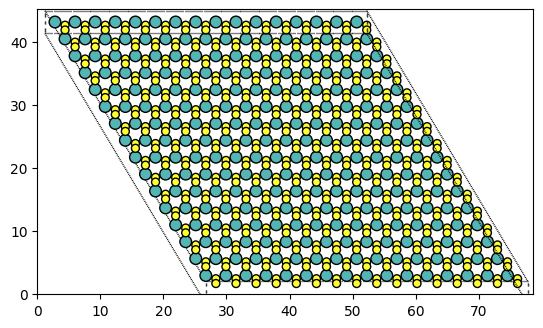

In [11]:
print_atom_structure(structure)

In [12]:
from oper import Defect, DefectSet, TopBatch, RandomBatch, BatchOper, EvalFunction

In [13]:
def get_atom(structure, matrices, defect):
    defect_pos = matrices[defect.cords[0]][defect.cords[1]][defect.cords[2]][2]
    atom = structure[int(defect_pos)]
    return atom

In [14]:
def is_Mo(atom):
    return atom.species.as_dict()['Mo'] == 1.0

def is_S1(atom):
    return abs(atom.frac_coords[2] -  0.144826) < 1e-5

def is_S2(atom):
    return abs(atom.frac_coords[2] - 0.355174) < 1e-5

In [15]:
def get_atom_id(atom):
    if is_S1(atom):
        return 0
    if is_Mo(atom):
        return 1
    if is_S2(atom):
        return 2
    raise ValueError(f"atom {atom.frac_coords} is not defined")

atom_types = [0, 1, 2]

In [16]:
def sort_func(elem):
    return elem[1], elem[0], elem[2]

In [17]:
def get_matrices_MoS2(structure):
    matrices = [[], [], []]
    for idx, atom in enumerate(structure):
        matrices[get_atom_id(atom)].append([atom.coords[0], atom.coords[1], idx])
    for matrix in matrices:
        matrix.sort(key=sort_func)
    matrices = np.array(matrices).reshape(3, 8*scale_x, 8*scale_y, 3)
    return matrices

In [18]:
matrices = get_matrices_MoS2(structure)

In [19]:
def calc_distance_with_repeat(atom1, atom2):
    return atom1.distance(atom2)
    
def calc_distance(atom1, atom2):
    x = (atom1.coords[0] - atom2.coords[0]) ** 2
    y = (atom1.coords[1] - atom2.coords[1]) ** 2
    z = (atom1.coords[2] - atom2.coords[2]) ** 2
    distance = math.sqrt(x + y + z)
    return distance

In [20]:
def get_energy(structure, matrices, defect_set, function_set, debug=False):
    energy = 0
    for defect1, defect2, in itertools.combinations_with_replacement(list(defect_set), 2):
        atom1 = get_atom(structure, matrices, defect1)
        atom2 = get_atom(structure, matrices, defect2)
        distance = calc_distance(atom1, atom2)
        energy += function_set(defect1.type, defect2.type, distance, debug)
    return energy

In [21]:
function_set = function_calc()

In [22]:
eval_function = EvalFunction(get_energy, structure, matrices, function_set)

In [23]:
%load_ext autoreload
%autoreload 2

In [24]:
def possible_moves(defect, max_range=1):
    if defect.type == 0 or defect.type == 2:
        return [0, 2], list(range(-max_range, max_range + 1)), list(range(-max_range, max_range + 1))
    if defect.type == 1 or defect.type == 3:
        return [1], list(range(-max_range, max_range + 1)), list(range(-max_range, max_range + 1))

In [25]:
def get_possible_positions(structure, matrices, defect, defect_set, max_range=1):
    possible_positions = []
    for move in itertools.product(*possible_moves(defect, max_range)):
        position = [move[0], defect.cords[1] + move[1], defect.cords[2] + move[2]]
        if not 0 <= position[1] < matrices[position[0]].shape[0]:
            continue
        if not 0 <= position[2] < matrices[position[0]].shape[1]:
            continue
        if Defect(cords=tuple(position)) in defect_set:
            continue
        possible_positions.append(position)
    return possible_positions

In [26]:
import random


def upd_defect_set(structure, matrices, defect_set, max_range=1):
    random_defect = random.sample(defect_set.defect_set, 1)[0]
    defect_set = defect_set.copy()
    defect_set.remove_defect(random_defect)
    possible_positions = get_possible_positions(structure, matrices, random_defect, defect_set, max_range)
    new_sets = []
    for position in possible_positions:
        new_set = defect_set.copy()
        new_set.add_defect(Defect(type=random_defect.type, cords=tuple(position)))
        new_sets.append(new_set)
    return new_sets

In [27]:
target=0

In [28]:
def random_position_in_center(defect_type):
    layer = 100
    if defect_type == 0 or defect_type == 2:
        layer = random.choice([0, 2])
    if defect_type == 1 or defect_type == 3:
        layer = 1
    x_len = matrices[layer].shape[0]
    y_len = matrices[layer].shape[1]
    x = random.choice(range(x_len//2-4, x_len//2+4))
    y = random.choice(range(y_len//2-4, y_len//2+4))
    return layer, x, y

In [29]:
def random_defects(empty_set, defects):
    new_set = empty_set.copy()
    for defect_type in defects:
        for i in range(defects[defect_type]):
            defect = Defect(defect_type, random_position_in_center(defect_type))
            while defect in new_set:
                defect = Defect(defect_type, random_position_in_center(defect_type))
            new_set.add_defect(defect)
    return new_set

In [30]:
def mutate(defect_set):
    random_defect = random.sample(defect_set.defect_set, 1)[0]
    defect_set = defect_set.copy()
    defect_set.remove_defect(random_defect)
    possible_positions = get_possible_positions(structure, matrices, random_defect, defect_set, 1)
    position = random.choice(possible_positions)
    new_defect = Defect(type=random_defect.type, cords=tuple(position))
    defect_set.add_defect(new_defect)
    return defect_set

In [41]:
def step_optimize(structure, matrices, batch_op, max_range=1):
    new_sets = []
    for defect_set in batch_op:
        new_sets.extend(upd_defect_set(structure, matrices, defect_set, max_range))
    batch_op.process_members(new_sets)
    for i in range(5):
        batch_op[2].mutate(mutate)
    energies = []
    for defect_set in batch_op:
        energies.append(defect_set.get_energy())
    return np.mean(energies), np.min(energies)

In [140]:
def upd_defect(structure, matrices, defect_set, defect, max_range=16):
    random_defect = defect
    defect_set = defect_set.copy()
    defect_set.remove_defect(random_defect)
    possible_positions = get_possible_positions(structure, matrices, random_defect, defect_set, max_range)
    new_sets = []
    for position in possible_positions:
        new_set = defect_set.copy()
        new_set.add_defect(Defect(type=random_defect.type, cords=tuple(position)))
        new_sets.append(new_set)
    return new_sets

In [141]:
def last_step_optimize(structure, matrices, best_set, max_range=16):
    top_batch_oper = BatchOper([TopBatch(1)])
    current_set = best_set.copy()
    for defect in best_set:
        new_sets = upd_defect(structure, matrices, current_set, defect, max_range)
        top_batch_oper.process_members(new_sets)
        current_set = top_batch_oper[0].members[0]
    return current_set

In [32]:
def create_printable_structure_MoS2(structure, defects):
    matrices = get_matrices_MoS2(structure)
    ans = structure.copy()
    to_delete = []
    for defect in defects:
        defect_id = int(matrices[defect.cords[0]][defect.cords[1]][defect.cords[2]][2])
        if defect.type == 0 or defect.type == 1:
            to_delete.append(defect_id)
        if defect.type == 2:
            ans.replace(defect_id, Element('Se'))
        if defect.type == 3:
            ans.replace(defect_id, Element('W'))
    ans.remove_sites(to_delete)
    return ans

In [77]:
batch_op = BatchOper([TopBatch(15), RandomBatch(30), TopBatch(20)], target_energy=-1000)
empty_set = DefectSet(eval_function)
defects = {
    0: 2,
    1: 2,
    2: 2,
    3: 2,
}
sets = []
for i in range(5):
    initial_set = random_defects(empty_set, defects)
    sets.append(initial_set)    
batch_op.process_members([initial_set])

In [78]:
energies_mean = []
energies_min = []
for i in range(40):
    mean_energy, min_energy = step_optimize(structure, matrices, batch_op)
    energies_mean.append(mean_energy)
    energies_min.append(min_energy)

In [79]:
import time
a = 0
b = 0
start_time = time.time()
for thing in batch_op:
    b += 1
    a += thing.get_energy()
print('Elapsed time: ', time.time() - start_time)

Elapsed time:  0.014207601547241211


In [80]:
print((7.2740771770477295/100)/(0.0156400203704834/b))

302.31099788106525


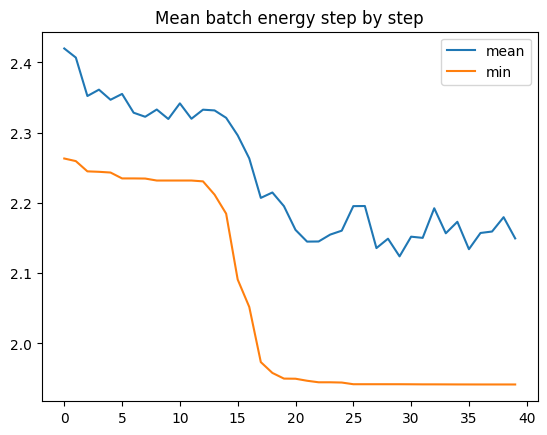

In [81]:
plt.plot(np.array(energies_mean), label='mean')
plt.plot(np.array(energies_min), label='min')
plt.title("Mean batch energy step by step")
plt.legend()
plt.show()

In [82]:
best_set = batch_op[0].members[0]

In [83]:
best_set

{[1,(1, 8, 8)], [1,(1, 8, 7)], [0,(0, 8, 7)], [3,(1, 0, 15)], [0,(2, 8, 7)], [2,(0, 9, 8)], [2,(2, 9, 7)], [3,(1, 7, 7)]}

In [144]:
best_set.get_energy()

1.9414768028518676

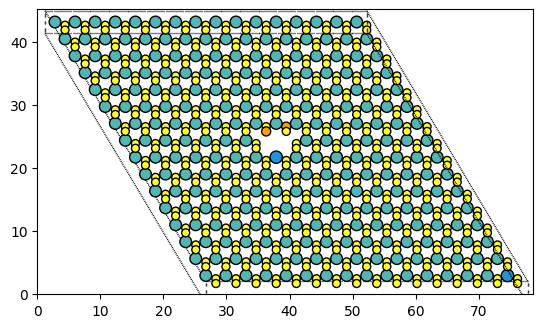

In [86]:
print_atom_structure(create_printable_structure_MoS2(structure, best_set))

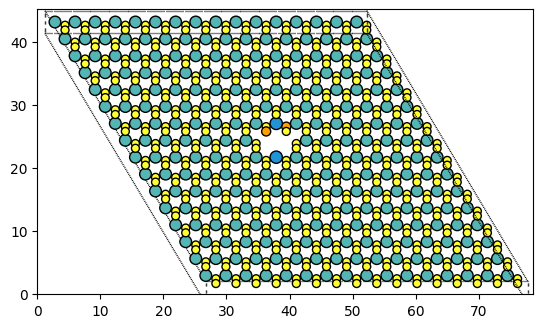

In [143]:
print_atom_structure(create_printable_structure_MoS2(structure, last_step_optimize(structure, matrices, best_set)))

In [145]:
better_set = last_step_optimize(structure, matrices, best_set)

In [147]:
print(best_set.get_energy() - better_set.get_energy())

0.003581026884629912


In [120]:
best_set

{[1,(1, 8, 8)], [1,(1, 8, 7)], [0,(0, 8, 7)], [3,(1, 0, 15)], [0,(2, 8, 7)], [2,(0, 9, 8)], [2,(2, 9, 7)], [3,(1, 7, 7)]}

7 7
8 7
8 8


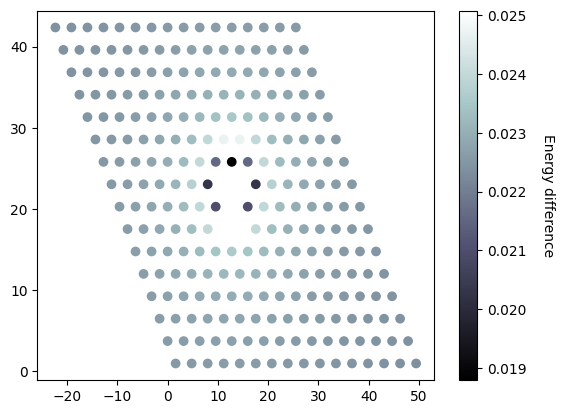

In [139]:
import matplotlib.pyplot as plt
import numpy as np

array_3d = matrices[0]

x = [item[0] for sublist in array_3d for item in sublist]
y = [item[1] for sublist in array_3d for item in sublist]

cell_coords = np.indices(array_3d.shape[:2]).reshape(2, -1).T

cel_c = []
cur_set = best_set.copy()
defect = Defect(3,(1, 0, 15))
cur_set.remove_defect(defect)
grub = []
for idx, (cell_x, cell_y) in enumerate(cell_coords):
    try:
        cur_set.add_defect(Defect(defect.type, (defect.cords[0], cell_x, cell_y)))
    except:
        print(cell_x, cell_y)
        grub.append(0)
        cel_c.append(0)
        continue
    grub.append(np.sqrt((cell_x-40)**2 + (cell_y-18)**2))
    cel_c.append(cur_set.get_energy())
    cur_set.remove_defect(Defect(defect.type,(defect.cords[0], cell_x, cell_y)))
cel_c = np.array(cel_c)
mean_thing = np.mean(cel_c)
cel_c[cel_c>0] -= np.mean(cel_c)
cel_c[cel_c==0] = np.max(cel_c)
# print(cel_c-np.mean(cel_c))
plt.scatter(x, y, c=cel_c, cmap='bone')
cbar = plt.colorbar()
cbar.set_label('Energy difference', rotation=270, labelpad=20)
plt.show()

In [130]:
cur_set.add_defect(Defect(defect.type, (defect.cords[0], 0, 15)))

In [131]:
cur_set.get_energy()-mean_thing

0.02237063626666269

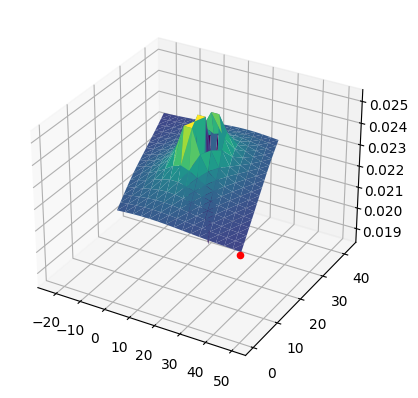

In [138]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(x, y, cel_c, cmap='viridis')
ax.scatter(50, 0, best_set.get_energy()-mean_thing, c='red', marker='o', label='Point of interest')
plt.show()

In [438]:
grub = [i for i in grub if i != 0]
cel_c = [i for i in cel_c if i != 0]

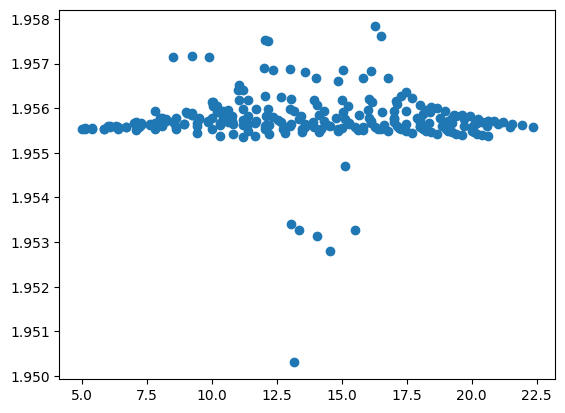

In [439]:
plt.scatter(grub, cel_c)

In [423]:
print(np.mean(list(i for i in cel_c if i!=0)))

1.955732231082909


In [442]:
all_funcs = [
            'Se_Se', # 0
            'Se_V_z_16', # 1
            'Se_V_z_42', # 2
            'V_z_16_V_z_16', # 3
            'V_z_42_V_z_16', # 4
            'V_z_42_V_z_42', # 5
            'W_Se', # 6
            'W_V_z_16', # 7
            'W_V_z_42', # 8
            'W_W' # 9
        ]
abiba = function_calc()
function_calc.__getattribute__(abiba, all_funcs[0])(2)

-0.00016773131395125593

In [445]:
dists = []
for atom in structure:
    for atom2 in structure:
        if atom != atom2:
            dists.append(calc_distance(atom, atom2))

-0.005899777067698578 -0.0011804390842767216


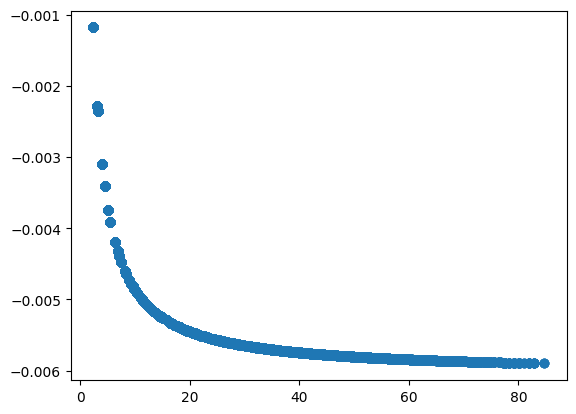

-0.05012130377566966 -0.03404523837710656


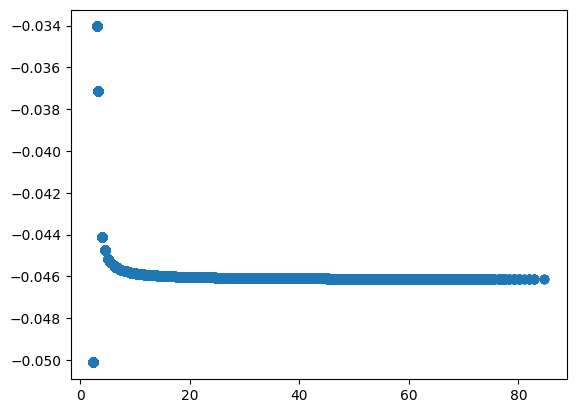

-0.09528680951872294 -5.8887654215830694e-36


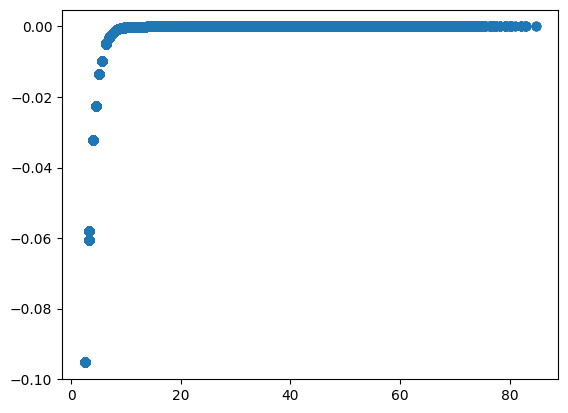

-0.050418812253656436 -0.005420453018896494


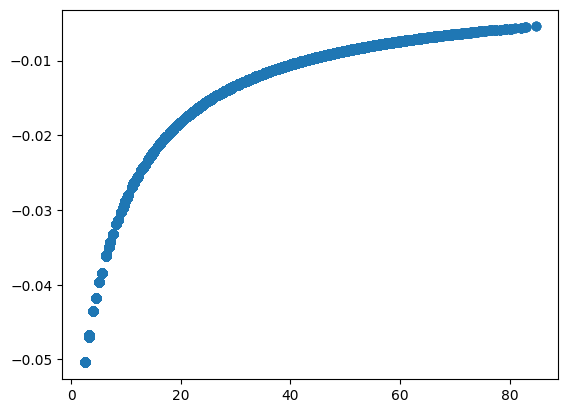

-0.9781522312797021 -1.4271121414367411e-33


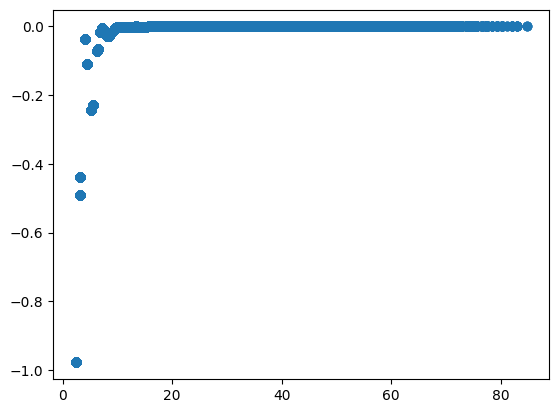

-0.7494296225682573 -1.2577096493717273e-36


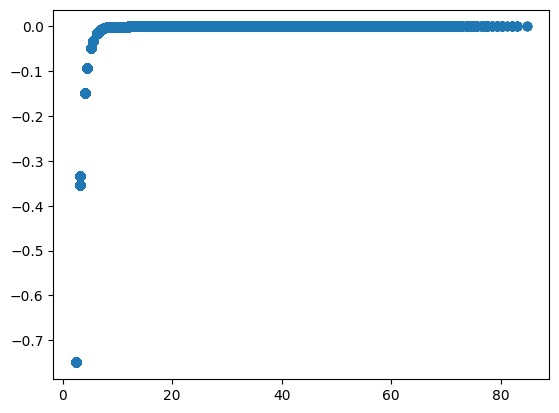

-0.01561839478832853 -0.0019374035994532517


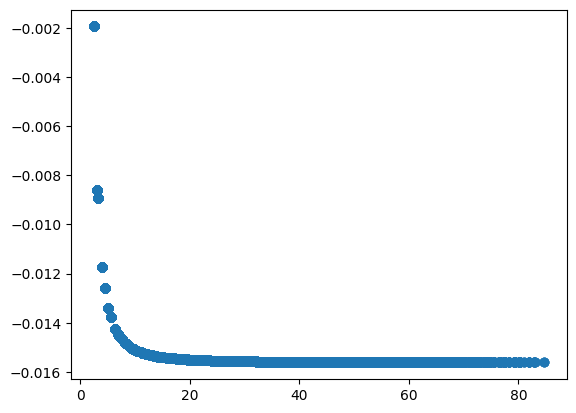

-0.019926516118625892 -0.003520512322438386


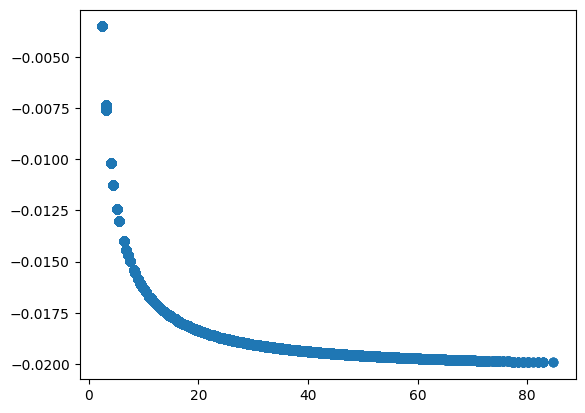

-0.03824450012241477 0.0015338919049179029


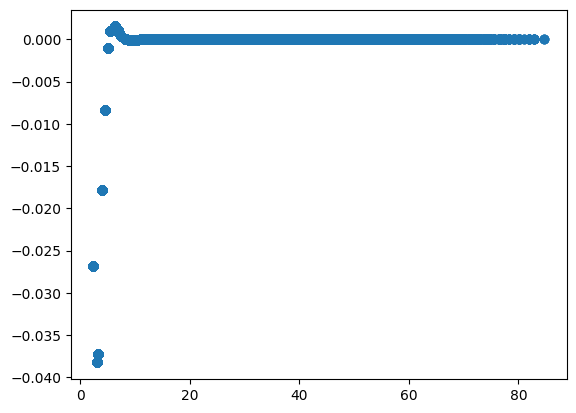

-7.326175342351224e-08 0.01395088119848289


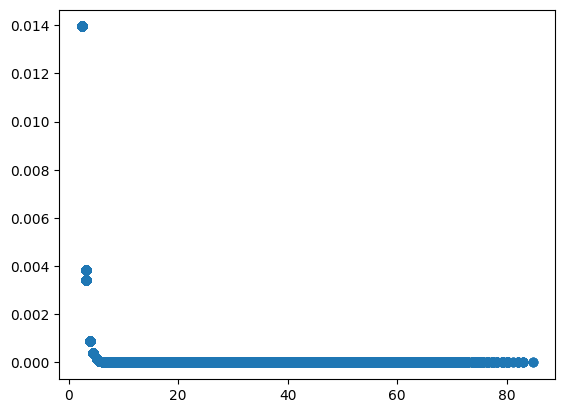

In [449]:
for func in all_funcs:
    values = []
    for dist in dists:
        values.append(function_calc.__getattribute__(abiba, func)(dist))
    print(min(values), max(values))
    plt.scatter(dists, values)
    plt.show()

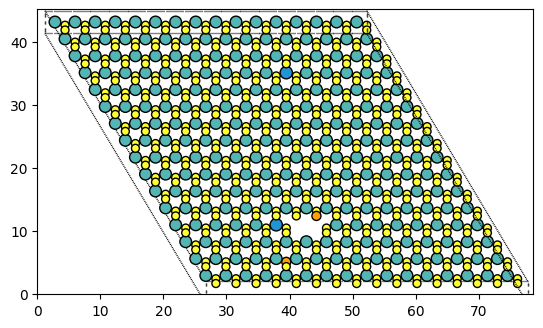

In [357]:
best_set = batch_op[1].members[6]
print_atom_structure(create_printable_structure_MoS2(structure, best_set))

In [358]:
best_set.get_energy(debug=True)

8 3.1903157850750894 -0.03725925512349148
2 6.823050916807838 -0.003282420181343158
5 3.1903156999999993 -0.33329041871678666
2 4.002459370980892 -0.03232286423633371
8 24.917162161964917 1.0683855276675959e-11
4 2.4169333360037606 -0.9781522312797009
4 2.416933336003761 -0.9781522312797009
6 6.823050817359514 -0.014445189940834656
8 6.380631485075089 0.0015122172312582397
6 6.823050877028507 -0.014445189963241891
9 24.91716216741129 -9.402179226893038e-15
7 5.118378109105471 -0.012433698374171765
7 5.118378109105472 -0.012433698374171765
2 8.179868823714934 -0.001013219107469698
0 10.069681261863092 -0.004872332900708857
6 28.637225771039944 -0.015565773524237962
1 7.106891682527894 -0.04564092677935785
1 6.380631400000003 -0.04553222053047691
2 2.4169336728972426 -0.09528679069913419
8 25.322345837954845 9.347981768176829e-12
4 2.4169336728972413 -0.9781521819934399
4 2.4169336728972426 -0.9781521819934401
6 23.56819316269674 -0.015536871130022313
1 3.190315700000001 -0.0371455930851

1.9580691008492779

In [359]:
def get_atom_from_cords(coords, structure):
    for idx, atom in enumerate(structure):
        if (abs(atom.coords - coords) < 0.01).all():
            yield idx, atom

In [360]:
def get_atom_id(coords, structure):
    return list(get_atom_from_cords(coords, structure))[0][0]

In [361]:
def get_matrices_coords(id):
    return tuple(arr[0] for arr in np.where(matrices == id)[:3])

In [362]:
get_atom_id((0.042, 0.333, 0.25),structure)

IndexError: list index out of range

In [ ]:
get_matrices_coords(get_atom_id((0.042, 0.333, 0.25),structure))

In [ ]:
d0 = Defect(1, get_matrices_coords(get_atom_id((0.042, 0.333, 0.25),structure)))
d1 = Defect(0, get_matrices_coords(get_atom_id((0.208, 0.167, 0.145),structure)))
d2 = Defect(2, get_matrices_coords(get_atom_id((0.083333, 0.291667, 0.355174),structure)))
d_set = DefectSet(eval_function)
d_set.add_defect(d0)
d_set.add_defect(d1)
d_set.add_defect(d2)
d_set.get_energy(debug=True) # 3.283003

In [ ]:
d0 = Defect(1, get_matrices_coords(get_atom_id((0.667,  0.333,  0.25),structure)))
d1 = Defect(0, get_matrices_coords(get_atom_id((0.333,  0.667,  0.145),structure)))
d2 = Defect(0, get_matrices_coords(get_atom_id((0.958,  0.042,  0.145),structure)))
d_set = DefectSet(eval_function)
d_set.add_defect(d0)
d_set.add_defect(d1)
d_set.add_defect(d2)
d_set.get_energy(debug=True) # 4.151911

In [ ]:
d0 = Defect(2, get_matrices_coords(get_atom_id((0.833333,  0.916667,  0.144826),structure)))
d1 = Defect(2, get_matrices_coords(get_atom_id((0.958333,  0.291667,  0.355174),structure)))
d_set = DefectSet(eval_function)
d_set.add_defect(d0)
d_set.add_defect(d1)
d_set.get_energy(debug=True) # 0.289753

In [ ]:
d0 = Defect(1, get_matrices_coords(get_atom_id((0.792,  0.208,  0.25),structure)))
d1 = Defect(0, get_matrices_coords(get_atom_id((0.208,  0.917,  0.145),structure)))
d2 = Defect(0, get_matrices_coords(get_atom_id((0.208,  0.667,  0.355),structure)))
d_set = DefectSet(eval_function)
d_set.add_defect(d0)
d_set.add_defect(d1)
d_set.add_defect(d2)
d_set.get_energy(debug=True) # 4.140348